# 확률적 경사 하강법

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/4-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## SGDClassifier

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')

In [15]:
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
# 확률적 경사하강법 패키지 임포트
from sklearn.linear_model import SGDClassifier

In [6]:
# loss : 손실함수 종류 지정  >> loss = 'log' : 로지스틱 손실 함수 지정
# 다중 분류일 경우 loss = 'log' 지정하면 클래스마다 이진 분류 모델 만듦  >> OvR(One versus Rest)라고 부름
# max_iter : 수행할 에포크 횟수 지정
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 출력된 훈련셋과 테스트 셋 정확도 낮음 > 지정한 반복횟수 10번이 부족한 것으로 보임

0.773109243697479
0.775


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [7]:
# SGDClassifier 객체 다시 만들지 않고 훈련한 모델 sc를 추가로 훈련  >> 모델을 이어서 훈련할때는 partial_fit() 메서드 사용
# fit()메서드와 사용법 동일하지만 호출할 때마다 1에포크씩 이어서 훈련 가능
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))
# 에포크 한번 더 실행하니 정확도 향상됨  >> 해당 모델을 여러 에포크에서 더 훈련해볼 필요 있음

0.8151260504201681
0.85


## 에포크와 과대/과소적합
#### 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있음
#### 에포크 횟수 적으면 덜 학습, 많으면 완전히 학습 > 훈련셋에 매우 잘 맞는 모델 만들어지겠지
#### 즉, 적은 에포크 횟수 동안 훈련한 모델은 과소적합된, 많이 훈련된 모델은 과대적합된 모델일 가능성 높음

In [8]:
# partial_fit()만 사용하렴련 훈련 셋에 있는 전체 클래스 레이블을 partial_fit() 메서드에 전달해줘야 함

import numpy as np

sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [9]:
# 300번 에포크 훈련 반복하여 진행
# _는 특별 변수 > 나중에 사용하지 않고 그냥 버리는 값을 넣어두는 용도로 사용 (여기서는 0~299 반복횟수 임시 저장용도로 사용)
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


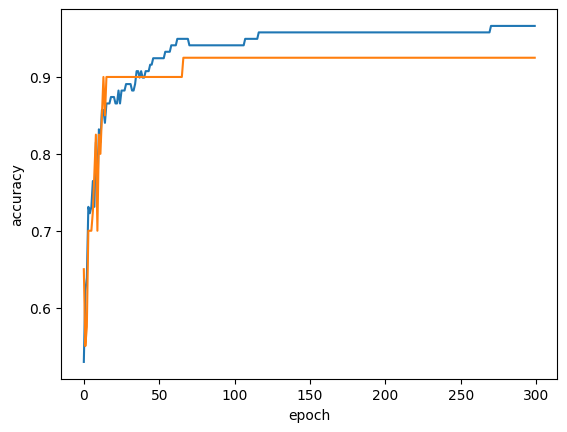

In [13]:
import matplotlib.pyplot as plt

plt.plot(train_score)   # 파란색
plt.plot(test_score)   # 주황색
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 100번째 에포크 이후에는 훈련셋, 테스트셋 점수 조금씩 벌어짐, 이 모델의 경우 에포크 100이 적절한 반복횟수로 보임


In [14]:
# 반복횟수 100으로 맞추고 모델 다시 훈련
# SGDClassifier는 일정 에포크동안 성능 향상되지 않으면 더 훈련하지 않고 자동으로 멈춤
# tol : 향상될 최소값 지정  >> 여기서는 None으로 지정하여 자동으로 멈추지 않고 max_iter(100)만큼 무조건 반복
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


In [12]:
# loss 매개변수 기본값은 'hinge'
# 힌지 손실 : SVM이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실함수
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
